# TODOs
* Plot weights (Gaussian function/kernel)
* Swap out equation for updating the activity rate
* Add external input

In [88]:
import math
import numpy as np
from matplotlib import pyplot as plt
import random

[[1.00000000e+00 9.80198673e-01 9.23116346e-01 ... 6.49934797e-20
  9.72098502e-21 1.39694394e-21]
 [9.80198673e-01 1.00000000e+00 9.80198673e-01 ... 4.17501006e-19
  6.49934797e-20 9.72098502e-21]
 [9.23116346e-01 9.80198673e-01 1.00000000e+00 ... 2.57675711e-18
  4.17501006e-19 6.49934797e-20]
 ...
 [6.49934797e-20 4.17501006e-19 2.57675711e-18 ... 1.00000000e+00
  9.80198673e-01 9.23116346e-01]
 [9.72098502e-21 6.49934797e-20 4.17501006e-19 ... 9.80198673e-01
  1.00000000e+00 9.80198673e-01]
 [1.39694394e-21 9.72098502e-21 6.49934797e-20 ... 9.23116346e-01
  9.80198673e-01 1.00000000e+00]]


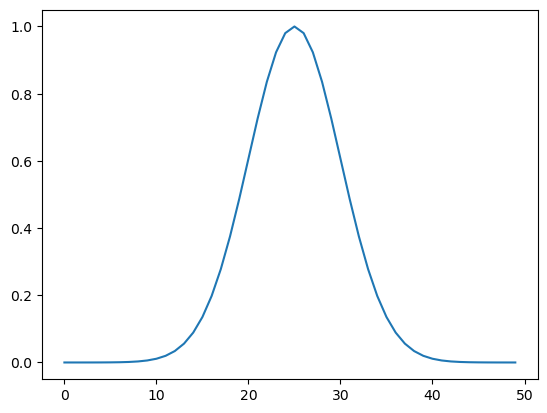

In [97]:
num_nodes = 50
num_time_steps = 10

w = np.zeros((num_nodes, num_nodes))
width = 0.2
for r in range(1, num_nodes + 1):
    for c in range(1, num_nodes + 1):
        w[r - 1][c - 1] = math.exp(-math.pow(r - c, 2) / 2 * math.pow(width, 2))

plt.plot(np.arange(num_nodes), w[num_nodes // 2])

print(w)

In [86]:
# activity rate per neuron for t timesteps
r = np.zeros((num_nodes, num_time_steps))
# assign random neuron state in the initial timestep
r[:, 0] = np.random.default_rng().random(num_nodes) * 5
print('t=1, initial neuron states\n')
print(r[:, 0], '\n')

t=1, initial neuron states

[4.44169793 0.37704281 0.36001894 1.02927852 1.02434995 4.50724328
 2.35634502 2.51572483 1.75427787 3.87802684 1.36690454 4.57426851
 4.04268687 0.674214   3.9765888  4.7524982  0.85923086 2.67534859
 0.23518655 1.2368219  1.20927728 1.82731202 1.46902932 3.78309716
 1.49396531 2.93506565 4.11974215 0.294992   4.09766435 3.0046106
 2.13637931 0.40294155 2.51547098 0.33696722 4.79114186 4.72743706
 0.39309739 1.24477962 2.19861895 1.65348641 2.80700597 1.42724096
 0.4590408  1.87037186 2.23662812 4.93549417 2.53984338 3.60579818
 1.02950852 4.84137296] 



In [87]:
# print(np.shape(w))
# print(r[:, 0].reshape(50, 1))
print(np.dot(w, r[:, 0]))

for t in range(1, num_time_steps):
    r[:, t] = np.tanh(np.dot(w, r[:, t - 1]))

print(r)

[4.73090393 3.44162934 2.0036159  2.60632691 4.7842688  7.06243932
 7.04715002 6.17222719 6.23876402 6.80348965 7.31561069 8.53754485
 8.04598821 6.82732719 8.01255108 8.18836706 5.95746491 4.20818224
 2.96291862 2.7510508  3.37097402 4.15226912 5.28557615 6.28449214
 6.35046779 6.9553345  6.91223841 6.12469738 6.98409084 6.955036
 5.10819299 3.7771122  3.98919398 5.49252212 8.27626647 8.13898042
 4.98529547 3.76530988 4.45973489 5.06287605 5.07076121 3.93645627
 3.21653037 4.42765482 6.82767263 8.59233926 8.2371427  7.1193505
 6.5522929  5.98367231]
[[4.44169793 0.99984448 0.94102884 0.93298009 0.93180625 0.93162952
  0.93160267 0.93159859 0.93159796 0.93159787]
 [0.37704281 0.9979525  0.98141372 0.979878   0.97961921 0.97957826
  0.97957195 0.97957099 0.97957084 0.97957082]
 [0.36001894 0.96428216 0.98526405 0.98523598 0.98517128 0.98515944
  0.98515757 0.98515728 0.98515723 0.98515723]
 [1.02927852 0.98916463 0.98588878 0.98579032 0.98576441 0.98576033
  0.98575973 0.98575964 0.9857